In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/DS340W')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
df = pd.read_csv('ai_job_market_insights.csv')
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for each column

# Define features and target variable
X = df.drop('Automation_Risk', axis=1)
y = df['Automation_Risk']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the processed data structure
X_train.head(), y_train.head()


(     Job_Title  Industry  Company_Size  Location  AI_Adoption_Level  \
 5            9         0             0         5                  2   
 116          9         8             2         0                  1   
 45           7         4             0         6                  2   
 16           8         5             1         6                  0   
 462          9         5             2         4                  1   
 
      Required_Skills     Salary_USD  Remote_Friendly  Job_Growth_Projection  
 5                  1  102825.007867                0                      1  
 116                7   93313.178871                0                      0  
 45                 2   93086.342533                0                      1  
 16                 4   78401.259282                0                      0  
 462                3   85743.834770                0                      1  ,
 5      2
 116    1
 45     2
 16     2
 462    2
 Name: Automation_Risk, dtype: int64)

<ipython-input-6-f2e6407f8ce6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Automation_Risk', data=df, palette='viridis')


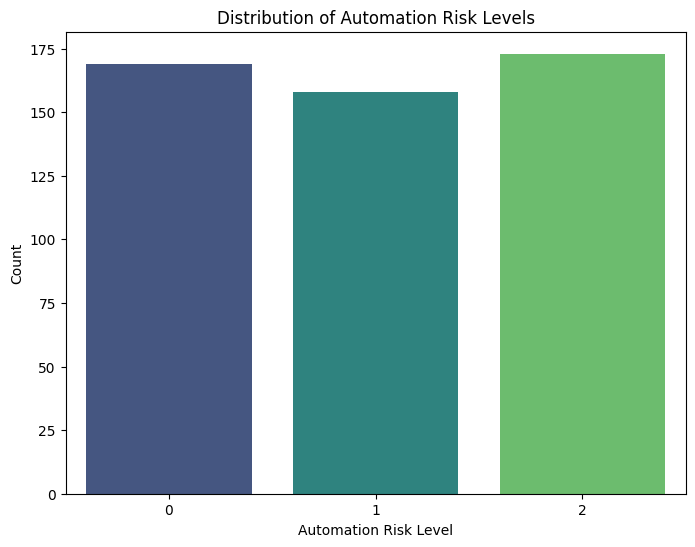

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Automation_Risk', data=df, palette='viridis')
plt.title('Distribution of Automation Risk Levels')
plt.xlabel('Automation Risk Level')
plt.ylabel('Count')
plt.show()

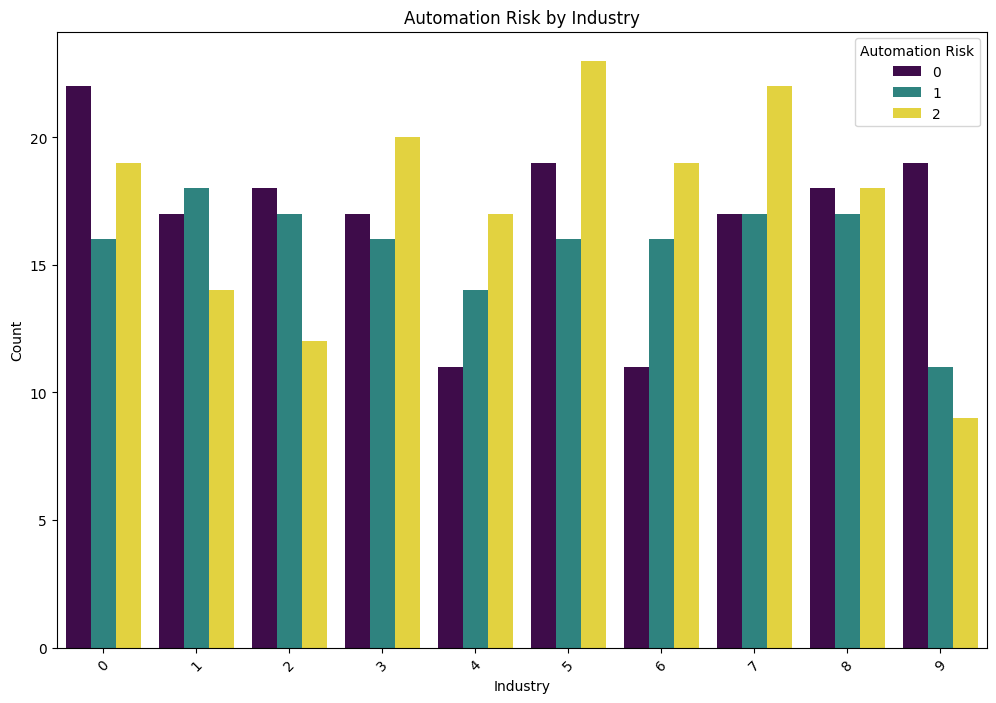

In [7]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Industry', hue='Automation_Risk', data=df, palette='viridis')
plt.title('Automation Risk by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Automation Risk')
plt.show()

<ipython-input-8-8d0a1dc85f61>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Automation_Risk', y='Salary_USD', data=df, palette='viridis')


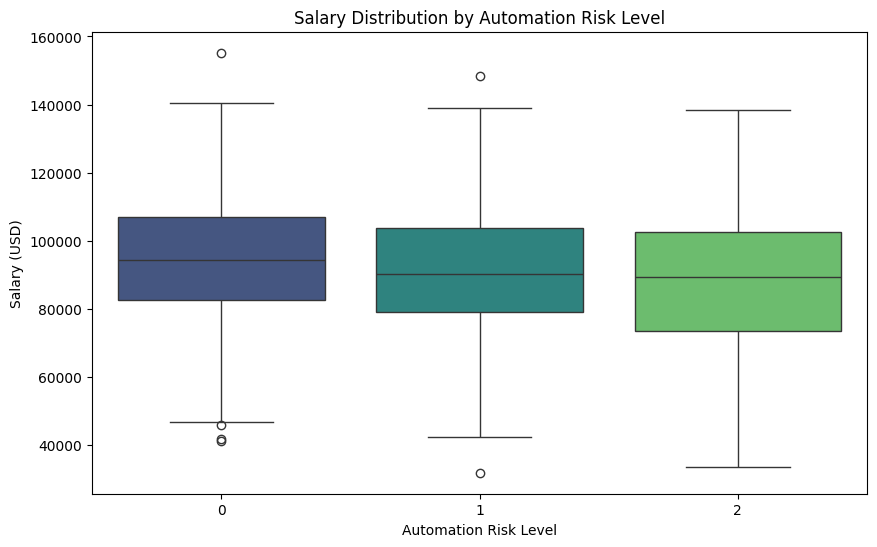

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Automation_Risk', y='Salary_USD', data=df, palette='viridis')
plt.title('Salary Distribution by Automation Risk Level')
plt.xlabel('Automation Risk Level')
plt.ylabel('Salary (USD)')
plt.show()

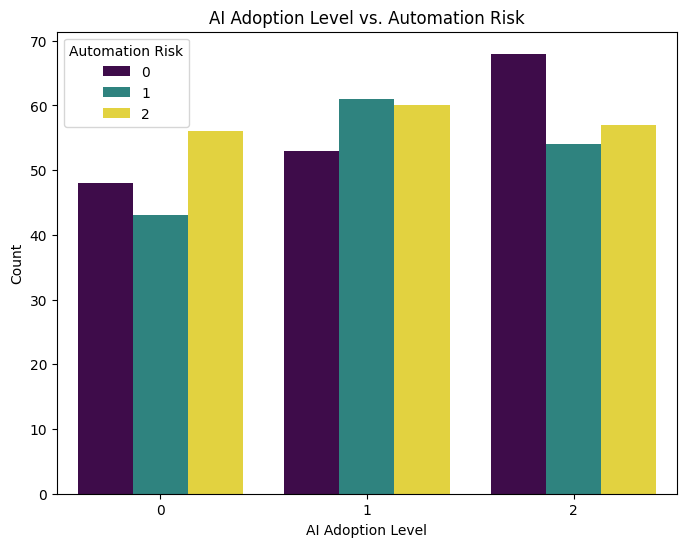

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='AI_Adoption_Level', hue='Automation_Risk', data=df, palette='viridis')
plt.title('AI Adoption Level vs. Automation Risk')
plt.xlabel('AI Adoption Level')
plt.ylabel('Count')
plt.legend(title='Automation Risk')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
df_encoded = df.copy()
for col in ['Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Required_Skills', 'Remote_Friendly', 'Job_Growth_Projection']:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Define features and target
X = df_encoded.drop('Automation_Risk', axis=1)
y = LabelEncoder().fit_transform(df_encoded['Automation_Risk'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  # Make sure to import accuracy_score

log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")

Logistic Regression Accuracy: 0.36


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Parameters for tuning
param_grid_log_reg = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [1000, 2000]
}

# Grid Search for Logistic Regression
grid_search_log_reg = GridSearchCV(LogisticRegression(random_state=42), param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)
best_log_reg = grid_search_log_reg.best_estimator_

# Evaluate on the test set
y_pred_best_log_reg = best_log_reg.predict(X_test)
accuracy_best_log_reg = accuracy_score(y_test, y_pred_best_log_reg)
print(f"Optimized Logistic Regression Accuracy: {accuracy_best_log_reg:.2f}")


Optimized Logistic Regression Accuracy: 0.33


In [13]:
# 2. Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {accuracy_decision_tree:.2f}")

Decision Tree Accuracy: 0.37


In [14]:
from sklearn.tree import DecisionTreeClassifier

# Parameters for tuning
param_grid_decision_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for Decision Tree
grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_decision_tree, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train, y_train)
best_decision_tree = grid_search_decision_tree.best_estimator_

# Evaluate on the test set
y_pred_best_decision_tree = best_decision_tree.predict(X_test)
accuracy_best_decision_tree = accuracy_score(y_test, y_pred_best_decision_tree)
print(f"Optimized Decision Tree Accuracy: {accuracy_best_decision_tree:.2f}")


Optimized Decision Tree Accuracy: 0.33


In [15]:
# 3. Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f"Random Forest Accuracy: {accuracy_random_forest:.2f}")

Random Forest Accuracy: 0.44


In [16]:
from sklearn.model_selection import GridSearchCV

# Parameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search for Random Forest
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluate on the test set
y_pred_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Optimized Random Forest Accuracy: {accuracy_best_rf:.2f}")

Optimized Random Forest Accuracy: 0.41


In [17]:
# 4. K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}")

K-Nearest Neighbors Accuracy: 0.30


In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Parameters for tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid Search for K-Nearest Neighbors
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

# Evaluate on the test set
y_pred_best_knn = best_knn.predict(X_test)
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"Optimized K-Nearest Neighbors Accuracy: {accuracy_best_knn:.2f}")


Optimized K-Nearest Neighbors Accuracy: 0.36


In [19]:
# 5. Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine Accuracy: {accuracy_svm:.2f}")

Support Vector Machine Accuracy: 0.39


In [20]:
from sklearn.svm import SVC

# Parameters for tuning
#param_grid_svm = {
    #'C': [0.1, 1, 10],
    #'kernel': ['linear', 'rbf', 'poly'],
    #'gamma': ['scale', 'auto']
#}

# Grid Search for Support Vector Machine
#grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
#grid_search_svm.fit(X_train, y_train)
#best_svm = grid_search_svm.best_estimator_

# Evaluate on the test set
#y_pred_best_svm = best_svm.predict(X_test)
#accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
#print(f"Optimized Support Vector Machine Accuracy: {accuracy_best_svm:.2f}")


In [21]:
# 6. Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
print(f"Gradient Boosting Accuracy: {accuracy_gradient_boosting:.2f}")

Gradient Boosting Accuracy: 0.38


In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")


XGBoost Accuracy: 0.39


In [24]:
from xgboost import XGBClassifier

# Parameters for tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Grid Search for XGBoost
grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_

# Evaluate on the test set
y_pred_best_xgb = best_xgb.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print(f"Optimized XGBoost Accuracy: {accuracy_best_xgb:.2f}")


Optimized XGBoost Accuracy: 0.37


In [25]:
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")
print(f"Optimized Logistic Regression Accuracy: {accuracy_best_log_reg:.2f}")
print(f"Decision Tree Accuracy: {accuracy_decision_tree:.2f}")
print(f"Optimized Decision Tree Accuracy: {accuracy_best_decision_tree:.2f}")
print(f"Random Forest Accuracy: {accuracy_random_forest:.2f}")
print(f"Optimized Random Forest Accuracy: {accuracy_best_rf:.2f}")
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}")
print(f"Optimized K-Nearest Neighbors Accuracy: {accuracy_best_knn:.2f}")
print(f"Support Vector Machine Accuracy: {accuracy_svm:.2f}")
#print(f"Optimized Support Vector Machine Accuracy: {accuracy_best_svm:.2f}")
print(f"Gradient Boosting Accuracy: {accuracy_gradient_boosting:.2f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print(f"Optimized XGBoost Accuracy: {accuracy_best_xgb:.2f}")

Logistic Regression Accuracy: 0.36
Optimized Logistic Regression Accuracy: 0.33
Decision Tree Accuracy: 0.37
Optimized Decision Tree Accuracy: 0.33
Random Forest Accuracy: 0.44
Optimized Random Forest Accuracy: 0.41
K-Nearest Neighbors Accuracy: 0.30
Optimized K-Nearest Neighbors Accuracy: 0.36
Support Vector Machine Accuracy: 0.39
Gradient Boosting Accuracy: 0.38
Optimized Gradient Boosting Accuracy: 0.35
XGBoost Accuracy: 0.39
Optimized XGBoost Accuracy: 0.37
